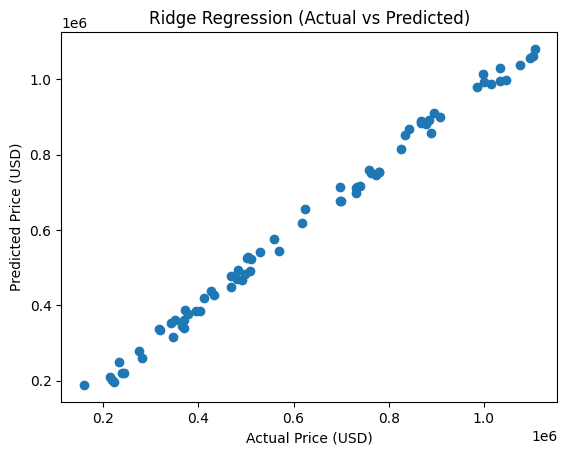

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = pd.read_csv("cleaned_house_sale.csv")

X = data[["area", "colB", "colC", "house_age", "zone_rating"]]
y = data["price_usd"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # สัดส่วนข้อมูลที่ใช้เป็นชุดทดสอบ (20%)
    random_state=42,      # กำหนดค่า seed เพื่อให้แบ่งข้อมูลเหมือนเดิมทุกครั้ง
    shuffle=True          # สุ่มข้อมูลก่อนแบ่ง train / test
)

scaler = StandardScaler() # ใช้ทำ normalization แบบ Z-score (mean=0, std=1)

X_train_scaled = scaler.fit_transform(X_train)  # คำนวณค่า mean/std จาก train แล้ว normalize
X_test_scaled = scaler.transform(X_test)        # normalize test ด้วยค่าเดียวกับ train

model = LinearRegression(
    fit_intercept=True,   # ให้โมเดลเรียนค่า intercept (β0)
    copy_X=True,          # คัดลอกข้อมูล X เพื่อไม่แก้ไขข้อมูลต้นฉบับ
    tol=0.0001,           # ค่า tolerance สำหรับเงื่อนไขหยุดการคำนวณ
    n_jobs=None,          # จำนวน core ที่ใช้ในการคำนวณ (None = 1 core)
    positive=False        # อนุญาตให้ coefficient ติดลบได้
)
model.fit(X_train_scaled, y_train)

y_pred_test = model.predict(X_test_scaled)

plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Price (USD)")
plt.ylabel("Predicted Price (USD)")
plt.title("Ridge Regression (Actual vs Predicted)")
plt.show()